In [1]:
pip install torchmetrics

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install torchsummary

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np 
import os
import matplotlib.pyplot as plt
import torch 
import os 
import torch.nn as nn
import torchvision.transforms as T 
import torch.nn.functional as F 
import torchvision
import pandas as pd
import numpy as np
import torch.utils.data as data_utils
import random
import math
from sklearn.model_selection import train_test_split
from torchsummary import summary

In [4]:
import matplotlib.pyplot as plt
from matplotlib import rcParams, cycler

rcParams['figure.figsize'] = 16, 8
rcParams['lines.linewidth'] = 2.5
rcParams['axes.prop_cycle'] = cycler(color = ['#424242'])
rcParams['xtick.labelsize'] = 'xx-large'
rcParams['ytick.labelsize'] = 'xx-large'

In [5]:
device = "cpu"
print(device)

cpu


# Model Class

In [6]:
class AR_3(nn.Module):

    def __init__(
        self,
        order,
        time,
        lr=0.05,
    ):
        super().__init__()
        self.lr = lr
        self.time=time
        self.device = torch.device("cpu:0")
        self.order = order
        self.net = nn.Sequential(
            nn.Linear(self.order, self.order * 2), nn.ReLU(), 
            nn.Linear(self.order * 2, self.order * 4), nn.ReLU(),
            nn.Linear(self.order * 4, self.order * 8), nn.ReLU(),
            nn.Linear(self.order * 8, self.order * 4), nn.ReLU(), 
            nn.Linear(self.order * 4, self.order * 2), nn.ReLU(), 
            nn.Linear(self.order * 2, self.order), nn.ReLU(),
            nn.Linear(self.order, 1)
        ).to(self.device)

    def prepare_data(self, X, batch_size=32):
        # Returning the data loader needed in training
        # given X : time series data, we need to return X, y in accordance to the given order
        # X is pandas dataframe and we will return tensors
        # num_samples will be = nrows(X) - (order of model)
        # i will be using which indexing ??? : (i, i+p)
        
        self.batch_size = batch_size
        dat = X.values[:, 1].astype(np.float32)
        dat = torch.from_numpy(dat)

        X_list = []
        y_list = []
        num_samples = len(dat) - self.order-self.time

        for i in range(num_samples):
            X_list.append(dat[i: i+self.order])
            y_list.append(dat[i+self.order+self.time-1])

        X = torch.stack(X_list).to(self.device)
        y = torch.stack(y_list).to(self.device)
        # from this dataset keep 2/10 examples for the testing phase : roughly 80
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=0.1, random_state=4)
        self.y_train = self.y_train.reshape(-1, 1)
        self.y_test = self.y_test.reshape(-1, 1)
        
        self.train_dataset = data_utils.TensorDataset(self.X_train, self.y_train)
        self.train_loader = data_utils.DataLoader(dataset=self.train_dataset, batch_size=batch_size)

    def forward(self, X):
        out = self.net(X)
        return out

# Implement

In [ ]:
d = pd.read_csv("/kaggle/input/aqidata1/LKO collocated sites data/1. BR Ambedkar_Dec2021_Nov2022.csv")
dat1 = d[["Timestamp", "Reference"]]
print(type(dat1))
dat1.head()

In [16]:
model = AR_3(order=32, lr=0.00001,time=1)
model.prepare_data(dat1, batch_size=128)
optimizer = torch.optim.SGD(model.parameters(), model.lr, momentum=0.5)
criterion = nn.MSELoss()
model.train(mode=True)

AR_3(
  (net): Sequential(
    (0): Linear(in_features=32, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=256, bias=True)
    (5): ReLU()
    (6): Linear(in_features=256, out_features=128, bias=True)
    (7): ReLU()
    (8): Linear(in_features=128, out_features=64, bias=True)
    (9): ReLU()
    (10): Linear(in_features=64, out_features=32, bias=True)
    (11): ReLU()
    (12): Linear(in_features=32, out_features=1, bias=True)
  )
)

In [17]:
# model2 = AR_3(order=64, lr=0.00001,time=48)
# model2.prepare_data(dat2, batch_size=128)
# optimizer = torch.optim.SGD(model2.parameters(), model2.lr, momentum=0.5)
# criterion = nn.MSELoss()
# model2.train(mode=True)

In [18]:
# summary(model.cpu(), (1, 8), device="cpu")

In [19]:
model.device

device(type='cpu', index=0)

In [20]:
# now let's train the model
model = model.to(model.device)
num_epochs = 100
num_steps = len(model.train_loader)

for epoch in range(num_epochs):
    for i, (X, y) in enumerate(model.train_loader):
        
        # forward pass:
        out = model(X)
        loss = criterion(out, y)

        # backward_pass:
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i == num_steps-1 ):
            print(f"epoch = {epoch+1}/{num_epochs}, step = {i+1}/{num_steps}, loss = {loss.item():.4f}")
            print("-" * 100)
            print("\n")

# # now let's train the model
# model2 = model2.to(model2.device)
# num_epochs = 100
# num_steps = len(model2.train_loader)

# for epoch in range(num_epochs):
#     for i, (X, y) in enumerate(model2.train_loader):
        
#         # forward pass:
#         out = model2(X)
#         loss = criterion(out, y)

#         # backward_pass:
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()

#         if (i == num_steps-1 ):
#             print(f"epoch = {epoch+1}/{num_epochs}, step = {i+1}/{num_steps}, loss = {loss.item():.4f}")
#             print("-" * 100)
#             print("\n")

epoch = 1/100, step = 44/44, loss = 496.2115
----------------------------------------------------------------------------------------------------


epoch = 2/100, step = 44/44, loss = 419.3684
----------------------------------------------------------------------------------------------------


epoch = 3/100, step = 44/44, loss = 339.1678
----------------------------------------------------------------------------------------------------


epoch = 4/100, step = 44/44, loss = 290.9521
----------------------------------------------------------------------------------------------------


epoch = 5/100, step = 44/44, loss = 255.7251
----------------------------------------------------------------------------------------------------


epoch = 6/100, step = 44/44, loss = 227.6289
----------------------------------------------------------------------------------------------------


epoch = 7/100, step = 44/44, loss = 209.6273
-------------------------------------------------------------------

In [21]:
model.eval()

with torch.no_grad():
    preds = model(model.X_test)
    loss = criterion(preds, model.y_test)

print(f"preds.shape = {preds.shape}")
print(f"y_test.shape = {model.y_test.shape}")

preds.shape = torch.Size([618, 1])
y_test.shape = torch.Size([618, 1])


In [22]:
# model2.eval()

# with torch.no_grad():
#     preds2 = model2(model2.X_test)
#     loss2 = criterion(preds2, model2.y_test)

# print(f"preds.shape = {preds2.shape}")
# print(f"y_test.shape = {model2.y_test.shape}")

In [23]:
print(f"loss = {loss.item():.4f}")

loss = 75.8155


In [24]:
mse = nn.MSELoss()

In [25]:
output = math.sqrt(mse(preds, model.y_test))
print("RMSE loss:", output)

RMSE loss: 8.707209999847558


In [26]:
from torchmetrics import R2Score
r2score = R2Score()
output1=r2score(preds, model.y_test)
print("R2_Score",output1)

R2_Score tensor(0.9378)


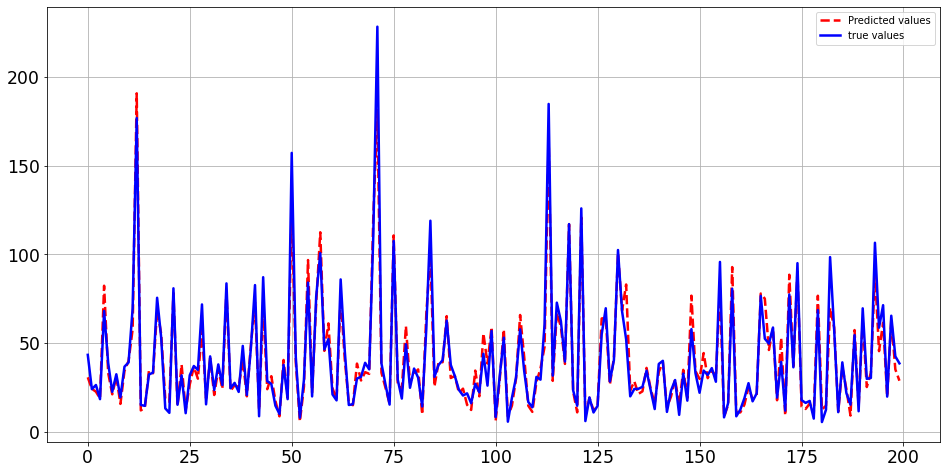

In [27]:
# t = torch.arange(len(preds))
t = torch.arange(200)
plt.plot(t.numpy(), preds[:200, 0].cpu().numpy(), 'r--', label="Predicted values")
plt.plot(t.numpy(), model.y_test[:200, 0].cpu().numpy(), "b-", label="true values")
plt.legend()
plt.grid()
plt.show()